In [1]:
import pandas as pd 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix, f1_score

In [2]:
data = pd.read_csv("Automobile_data.csv")

In [3]:
data.shape

(205, 26)

In [4]:
data.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price'],
      dtype='object')

In [5]:
data['symboling'].value_counts()

 0    67
 1    54
 2    32
 3    27
-1    22
-2     3
Name: symboling, dtype: int64

In [9]:
data.replace('?',np.nan,inplace = True)

In [8]:
string_col = data.select_dtypes(exclude = np.number).columns.tolist()

In [7]:
num_cols = ['normalized-losses','bore','stroke','horsepower','peak-rpm','price']
data.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

In [10]:
for i in num_cols: 
  data[i] = pd.to_numeric(data[i],errors = 'raise')

In [13]:
pd.to_numeric?

In [11]:
#categorical converstion
from pandas.api.types import is_string_dtype
for i in data: 
  if is_string_dtype(data[i]):
    data[i] = data[i].astype('category').cat.as_unordered()

In [12]:
data['fuel-system'].value_counts()

mpfi    94
2bbl    66
idi     20
1bbl    11
spdi     9
4bbl     3
spfi     1
mfi      1
Name: fuel-system, dtype: int64

In [13]:
data['fuel-system'].cat?

Repr: <alias cat for 'cat'>


In [14]:
data['fuel-system'].cat

In [15]:
#Cat code conversions
for i in data: 
  if(str(data[i].dtype)=='category'):
    data[i] = data[i].cat.codes

In [16]:
data.fillna(data.median(),inplace= True)
#data.dropna()

In [17]:
#Modelling
X = data.drop('symboling',axis = 1)
y = data['symboling']

In [18]:
#train and test
x_train, x_val, y_train, y_val = train_test_split(X,y,test_size = 0.2,random_state = 100)

/home/ravi/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


The F1Score using LR, 0.18495934959349591


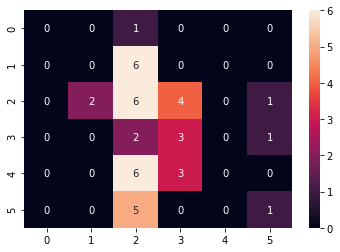

In [19]:
lr = LogisticRegression()
lr.fit(x_train,y_train)
y_predict = lr.predict(x_val)
sns.heatmap(confusion_matrix(y_val,y_predict),annot = True)
print("The F1Score using LR,",f1_score(y_val,y_predict,average = 'weighted'))

The F1Score using DT: 0.7717636022514072


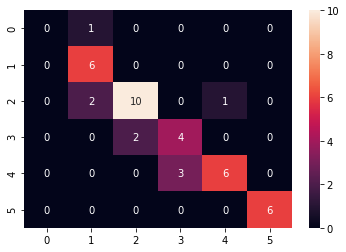

In [20]:
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
y_predict = dt.predict(x_val)
sns.heatmap(confusion_matrix(y_val,y_predict),annot = True)
print("The F1Score using DT:",f1_score(y_val,y_predict,average = 'weighted'))